In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files = glob.glob('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/*.csv')
files[:10]

['../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/02-17-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-31-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/03-25-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/02-01-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/03-11-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/02-13-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/03-05-2020.csv']

In [3]:
df = pd.concat([pd.read_csv(f) for f in files], sort=False)
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key,Latitude,Longitude
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,NaN,Thailand,1/24/20 17:00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,South Korea,1/24/20 17:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,Singapore,1/24/20 17:00,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,Vietnam,1/24/20 17:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


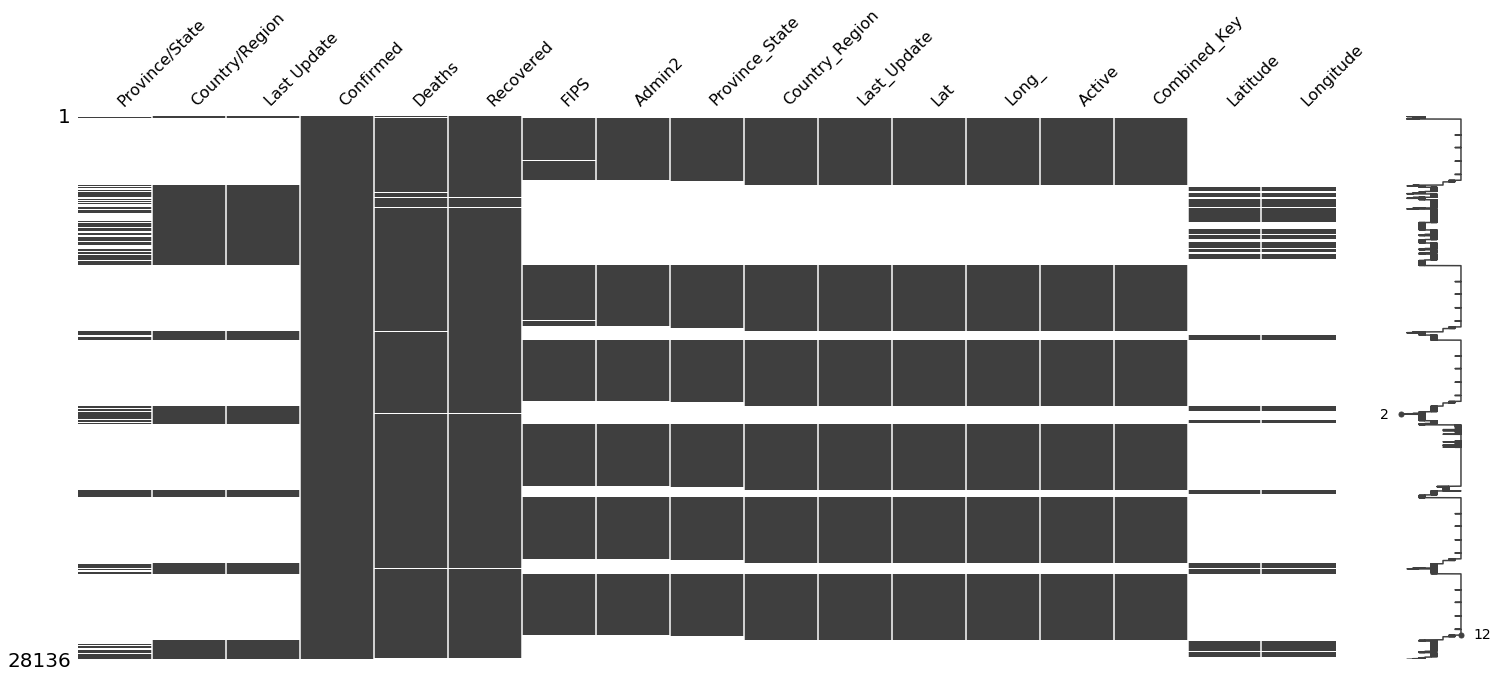

In [5]:
import missingno as msno
msno.matrix(df);

## NaN's

Pelo visto, alguns dias abençoados os datasets vieram com os nomes das colunas errados. Vou ter que tratar isso aqui.

In [6]:
df.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Last_Update', 'Lat', 'Long_', 'Active',
       'Combined_Key', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
name_map = {
    'Province_State': 'Province/State',
    'Country_Region': 'Country/Region',
    'Lat': 'Latitude',
    'Long_': 'Longitude',
    'Last_Update': 'Last Update'
}

In [12]:
data = []
for f in files:
    _df = pd.read_csv(f)
    for c in _df.columns:
        if c in name_map:
            _df[name_map[c]] = _df[c]
    _df = _df[['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered']]
    data.append(_df)
df = pd.concat(data, sort=False)

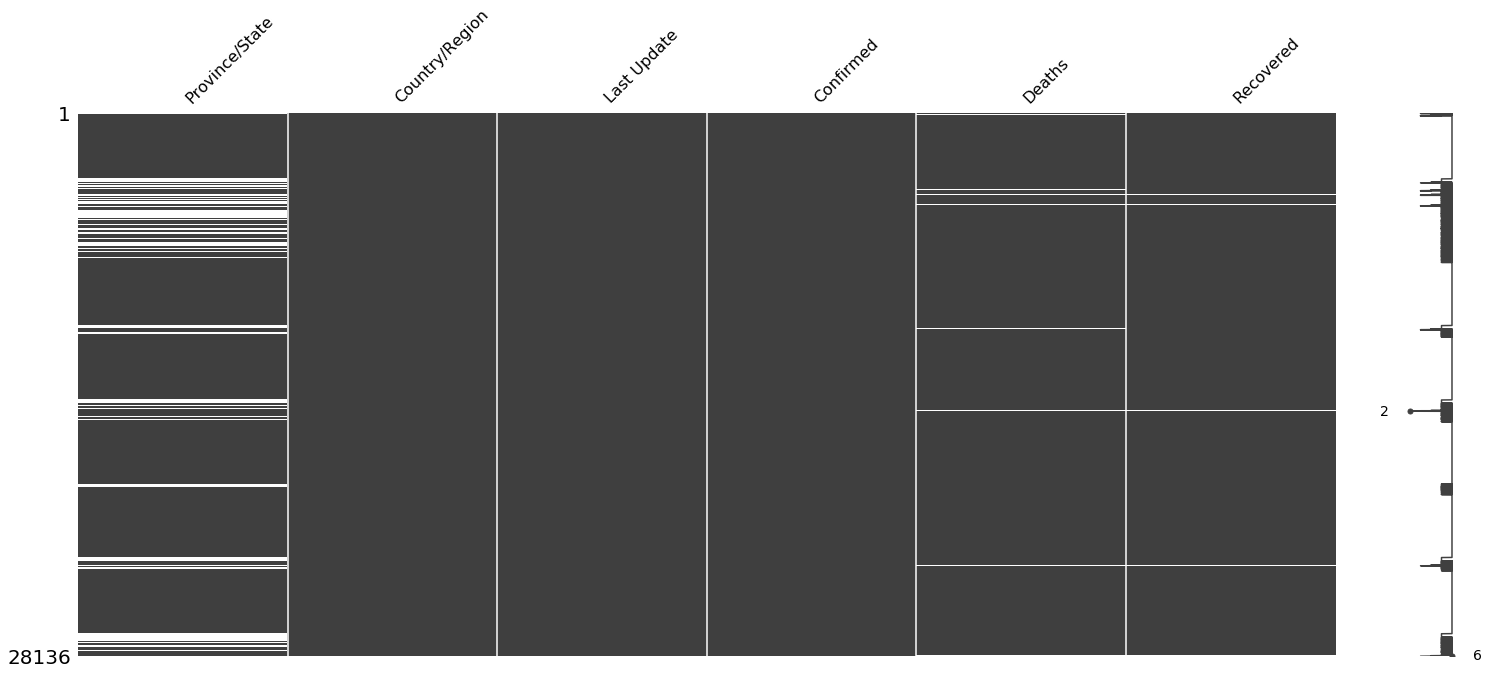

In [13]:
msno.matrix(df);

In [16]:
df.columns = ['Province', 'Country', 'LastUpdate', 'Confirmed', 'Deaths', 'Recovered']
df.to_csv('../data/interim/covid_base.csv', index=False)

In [17]:
df

,Province,Country,LastUpdate,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
...,...,...,...,...,...,...
36,NaN,Thailand,1/24/20 17:00,5.0,NaN,NaN
37,NaN,South Korea,1/24/20 17:00,2.0,NaN,NaN
38,NaN,Singapore,1/24/20 17:00,3.0,NaN,NaN
39,NaN,Vietnam,1/24/20 17:00,2.0,NaN,NaN
